In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import yaml
import tables
import ujson as json

FONT_SIZE = 15

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [120]:
import math

In [148]:
! wc -l ../intervals.log

53749649 ../intervals.log


In [125]:
fields = ['type', 'i1', 'i2', 'i3', 'i4', 'i0']
df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=0)
df_global.head()

,type,i1,i2,i3,i4,i0
0,0,4.30407,16.1181,16.1181,16.1181,12.69720
1,0,4.29046,16.1181,16.1181,16.1181,14.27760
2,0,4.27667,16.1181,16.1181,16.1181,14.71130
3,0,4.26268,16.1181,16.1181,16.1181,5.53339
4,0,4.24850,16.1181,16.1181,16.1181,8.03301


### Distribution of single field. 
* i0 is future interval, i1 is the most recent interval, i4 is the most old interval
* Each column is an observation point, point 1 million sample started from x million request

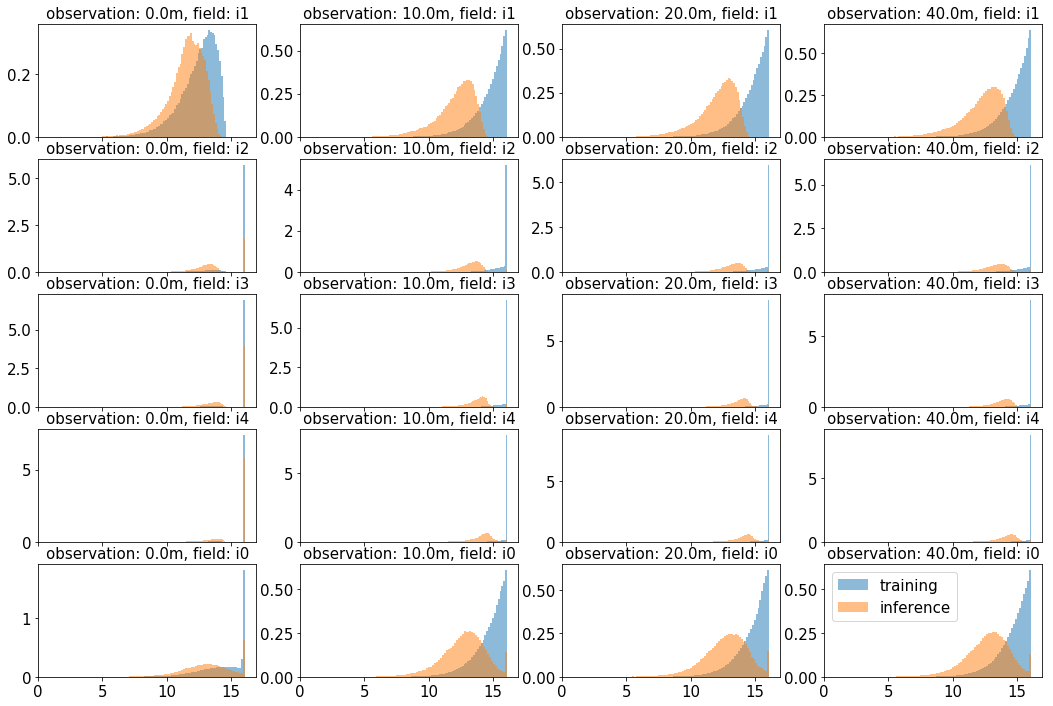

In [157]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[df_global.type != 2][l]
        df_inference = df_global[df_global.type == 2][l]
        axes[j][i].hist(df_training.values, alpha=0.5, label='training', bins=100, density=True)
        axes[j][i].hist(df_inference.values, alpha=0.5, label='inference', bins=100, density=True)
        axes[j][i].set_xlim([0, 17])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

### Distribution of single field (linear scale)
* i0 is future interval, i1 is the most recent interval, i4 is the most old interval
* Each column is an observation point, point 1 million sample started from x million request

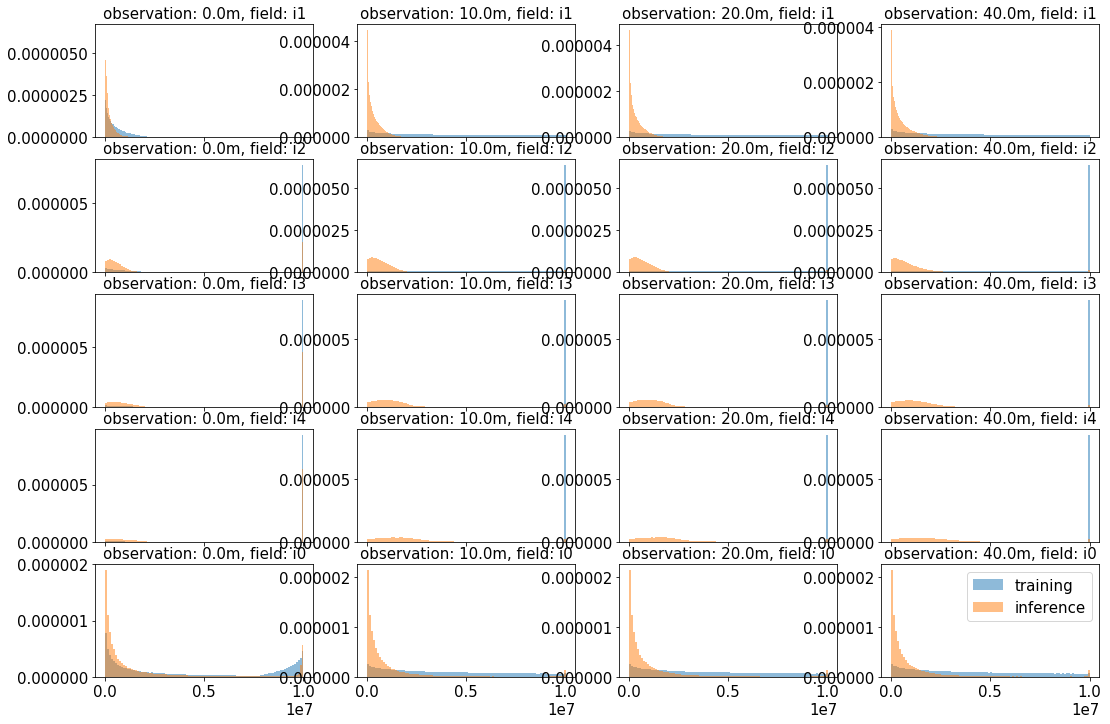

In [155]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[df_global.type != 2][l]
        df_inference = df_global[df_global.type == 2][l]
        axes[j][i].hist(np.exp(df_training.values), alpha=0.5, label='training', bins=100, density=True)
        axes[j][i].hist(np.exp(df_inference.values), alpha=0.5, label='inference', bins=100, density=True)
#         axes[j][i].set_xlim([0, np.exp(17)])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

### Distribution of single past interval vs future interval. 
* i1 is the most recent interval, i4 is the most old interval
* Each column is an observation point, point 1 million sample started from that point

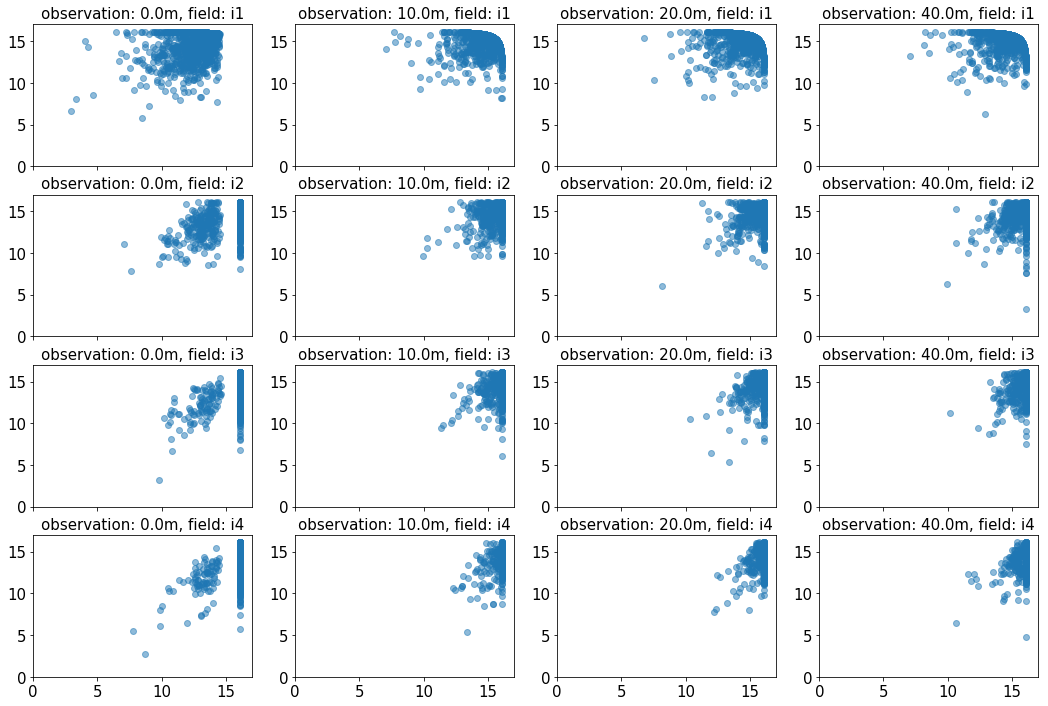

In [159]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=4, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=100, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4']):
        df = df_global[df_global.type != 2][[l, 'i0']].sample(n=1000, replace=False)
        axes[j][i].scatter(x=df[l], y=df['i0'], alpha = 0.5)
#         axes[j][i].hist([1,2,3,4,5,5,5,5])
        axes[j][i].set_xlim([0, 17])
        axes[j][i].set_ylim([0, 17])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.show()